<h1>Importing Libraries and Loading Data</h1>

In [36]:
# Importing the necessary libraries

import math
import snowflake.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [3]:
# Snowflake Login Credentials

conn = snowflake.connector.connect(
    user='RUTHVIK',
    password='Ruthvik@161102',
    account='uxatedl-cp08110',
    warehouse='COMPUTE_WH',
    database='JMAN_FINAL_PROJECT',
    schema='PUBLIC'
)

# Execute a SQL query and fetch data into a dataframe
users = pd.read_sql("SELECT * FROM users", conn)
user_projects = pd.read_sql("SELECT * FROM user_projects", conn)
user_skills = pd.read_sql("SELECT * FROM user_skills", conn)
projects = pd.read_sql("SELECT * FROM projects", conn)

# Close the connection
conn.close()

C:\Users\Hp\AppData\Local\Temp\ipykernel_18536\3019202769.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  users = pd.read_sql("SELECT * FROM users", conn)
C:\Users\Hp\AppData\Local\Temp\ipykernel_18536\3019202769.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  user_projects = pd.read_sql("SELECT * FROM user_projects", conn)
C:\Users\Hp\AppData\Local\Temp\ipykernel_18536\3019202769.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  user_skills = pd.read_sql("SELECT * FROM user_skills", conn)
C:\Users\Hp\AppData\L

In [4]:
# Leading the datasets (Manual Loading Data)

# users = pd.read_csv('users.csv')
# projects = pd.read_csv('projects.csv')
# user_projects = pd.read_csv('user_projects.csv')
# user_skills = pd.read_csv('user_skills.csv')

<h1>Univariate Analysis</h1>

In [5]:
users

,USER_ID,FULL_NAME,EMAIL,GENDER,ROLE,BIRTH_DATE,LOCATION,PHONE
0,1,Darrin Sloyan,dsloyan0@altervista.org,Male,user,06/25/1988,Delhi,7854462788
1,2,Bentley Burgoin,bburgoin1@purevolume.com,Male,approver,12/27/1989,Birmingham,7397084605
2,3,Ysabel Bartoszinski,ybartoszinski2@yahoo.com,Female,user,06-05-1990,Jaipur,6892070218
3,4,Irena Reynish,ireynish3@sphinn.com,Female,approver,08-06-1985,Glasgow,5167001065
4,5,Ettie Truce,etruce4@economist.com,Female,user,05/26/1981,Pune,8127970211
...,...,...,...,...,...,...,...,...
355,356,Beltran Priest,bpriest5@imageshack.us,Male,admin,01/28/1973,Glasgow,2742746718
356,357,Marlie Mennithorp,mmennithorp6@tuttocitta.it,Female,admin,01-08-1976,Ahmedabad,6731511407
357,358,Jo ann Reeks,jann7@reverbnation.com,Female,admin,04/21/1976,Los Angeles,7393338192
358,359,Linn Petkovic,lpetkovic8@economist.com,Female,admin,02/17/1977,Manchester,5903215327


In [6]:
projects

,PROJECT_NAME,PROJECT_ID,DESCRIPTION,START_DATE,PROJECT_STATUS,END_DATE,CLIENT,BUDGET_USD,PRIORITY,PROJECT_CATEGORY,TEAM_LEAD,LOCATION
0,QuantumSphere,1,"Displaced intartic fracture of r calcaneus, in...",09-21-2013,On Hold,02-17-2019,"Stellar Biotechnologies, Inc.",451316,medium,E-commerce and Online Marketplace Platforms,230,Pune
1,CodeNexus,2,Complete traumatic amputation of one right les...,07-15-2019,On Hold,01-27-2020,Potbelly Corporation,518067,medium,E-commerce and Online Marketplace Platforms,338,Lucknow
2,TechVoyage,3,"Other physeal fracture of left calcaneus, sequela",07-05-2011,Completed,12-16-2016,Helen of Troy Limited,389018,high,IoT and Embedded Systems,95,Manchester
3,DataPulse,4,"Person outsd bus inj pick-up truck, pk-up/van ...",11-13-2010,Completed,02-22-2024,Numerex Corp.,75893,high,IoT and Embedded Systems,29,Birmingham
4,CyberForge,5,"Oth physeal fx lower end of r fibula, subs for...",12-12-2015,Completed,03-09-2020,"Interlink Electronics, Inc.",66122,low,Data Science and Analytics,137,Bhopal
5,PixelStorm,6,"Infective myositis, unspecified forearm",04-21-2022,On Hold,None,Grupo Aeroportuario del Centro Norte S.A.B. de...,140843,low,Data Science and Analytics,181,Glasgow
6,CodeCraft,7,"Poisoning by iminostilbenes, assault, subseque...",05-08-2023,On Hold,None,PIMCO New York Municipal Income Fund III,436032,medium,DevOps and CI/ CD,190,Delhi
7,ByteFusion,8,"Unsp superfic inj unsp extrn genital organs, f...",01-03-2021,Completed,None,Ashford Hospitality Trust Inc,648854,medium,Artificial Intelligence and Machine Learning,127,Lucknow
8,CloudWave,9,"Breakdown of femoral arterial graft (bypass), ...",05-19-2011,On Hold,06-26-2012,CBX (Listing Market NYSE Networks AE,228735,medium,Cloud Computing and Infrastructure,304,Ahmedabad
9,CodeBlitz,10,Prolapse of vaginal vault after hysterectomy,05-02-2023,On Hold,None,Rice Midstream Partners LP,883056,medium,Cloud Computing and Infrastructure,105,London


In [7]:
user_projects

,USER_ID,PROJECT_ID,ROLE,SKILL
0,194,20.0,UI/UX Designer,Go
1,85,16.0,DevOps Engineer,Apache Spark
2,67,10.0,Business Analyst,Hibernate
3,123,15.0,System Analyst,TypeScript
4,198,9.0,QA Engineer,Apache Hadoop
...,...,...,...,...
2995,265,3.0,DevOps Engineer,TypeScript
2996,165,24.0,Full Stack Developer,GraphQL
2997,126,38.0,QA Engineer,Unity
2998,179,36.0,System Analyst,Xamarin


In [8]:
user_skills

,USER_ID,SKILL,CERTIFICATION_NAME,OBTAINED_DATE,EXPIRY_DATE,STATUS,PROFICIENCY_LEVEL,CERTIFICATION_ID,ISSUED_BY
0,265,Bash scripting,Bash scripting - Beginner,09-05-2022,08/22/2017,Approved,51,6c49957f-3cbe-4708-8590-02ad4db2a753,Ntag
1,19,PHP,PHP - Beginner,09/26/2015,08-10-2017,Rejected,93,70c488f9-fb26-4af2-957e-5d1992fb017b,Oyope
2,144,jQuery,jQuery - Beginner,05/17/2019,08-12-2015,Yet to Verify,100,d125f8b8-ec8b-48c6-b640-59919a25eb45,Jamia
3,40,Ruby,Ruby - Intermediate,02-12-2022,12/26/2023,Approved,69,e077e058-3b0f-4250-bf60-0dd039e6b2e4,Livetube
4,329,Flask,Flask - Expert,09/18/2015,02-12-2015,Approved,73,9427e788-d50f-4a7b-8665-a2353de7f009,Kimia
...,...,...,...,...,...,...,...,...,...
4995,75,SQL,SQL - Beginner,02/15/2016,04-05-2021,Approved,61,ca93dc40-4122-431e-afe5-8fc17184dd6e,Tagtune
4996,248,TypeScript,TypeScript - Intermediate,04-06-2024,10/14/2022,Approved,85,e73c5497-1867-4001-a899-83f1ebd1a289,Photolist
4997,350,Flask,Flask - Expert,01-10-2024,10/24/2015,Approved,91,1f883396-ce4f-4363-8683-51e3eca38736,Tagfeed
4998,196,ASP.NET Core,ASP.NET Core - Beginner,06/25/2021,06/16/2021,Approved,75,566e829b-48b0-4326-8320-6be205fd6135,Eazzy


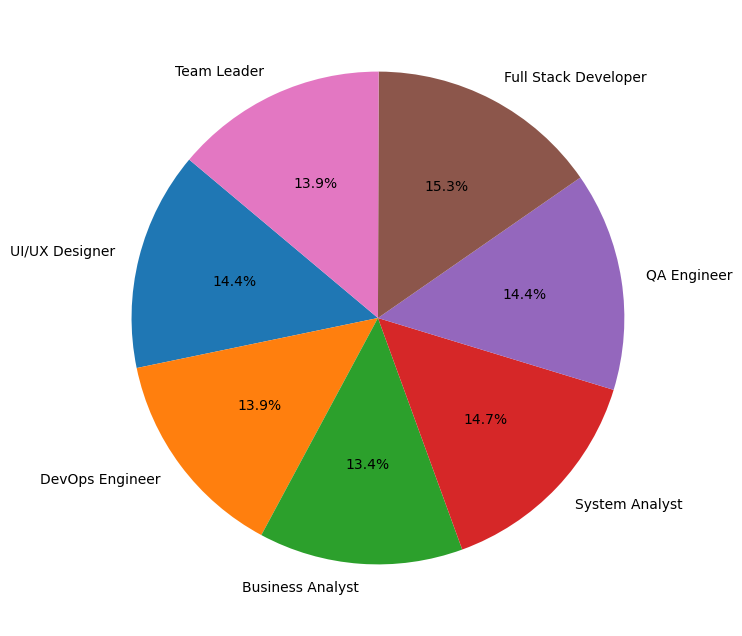

In [9]:
# Distribution of different roles in the organization

plt.figure(figsize=(8, 8))
counter = Counter(user_projects.ROLE)
plt.pie(counter.values(),labels = counter.keys(), autopct='%1.1f%%', startangle=140)
plt.show()

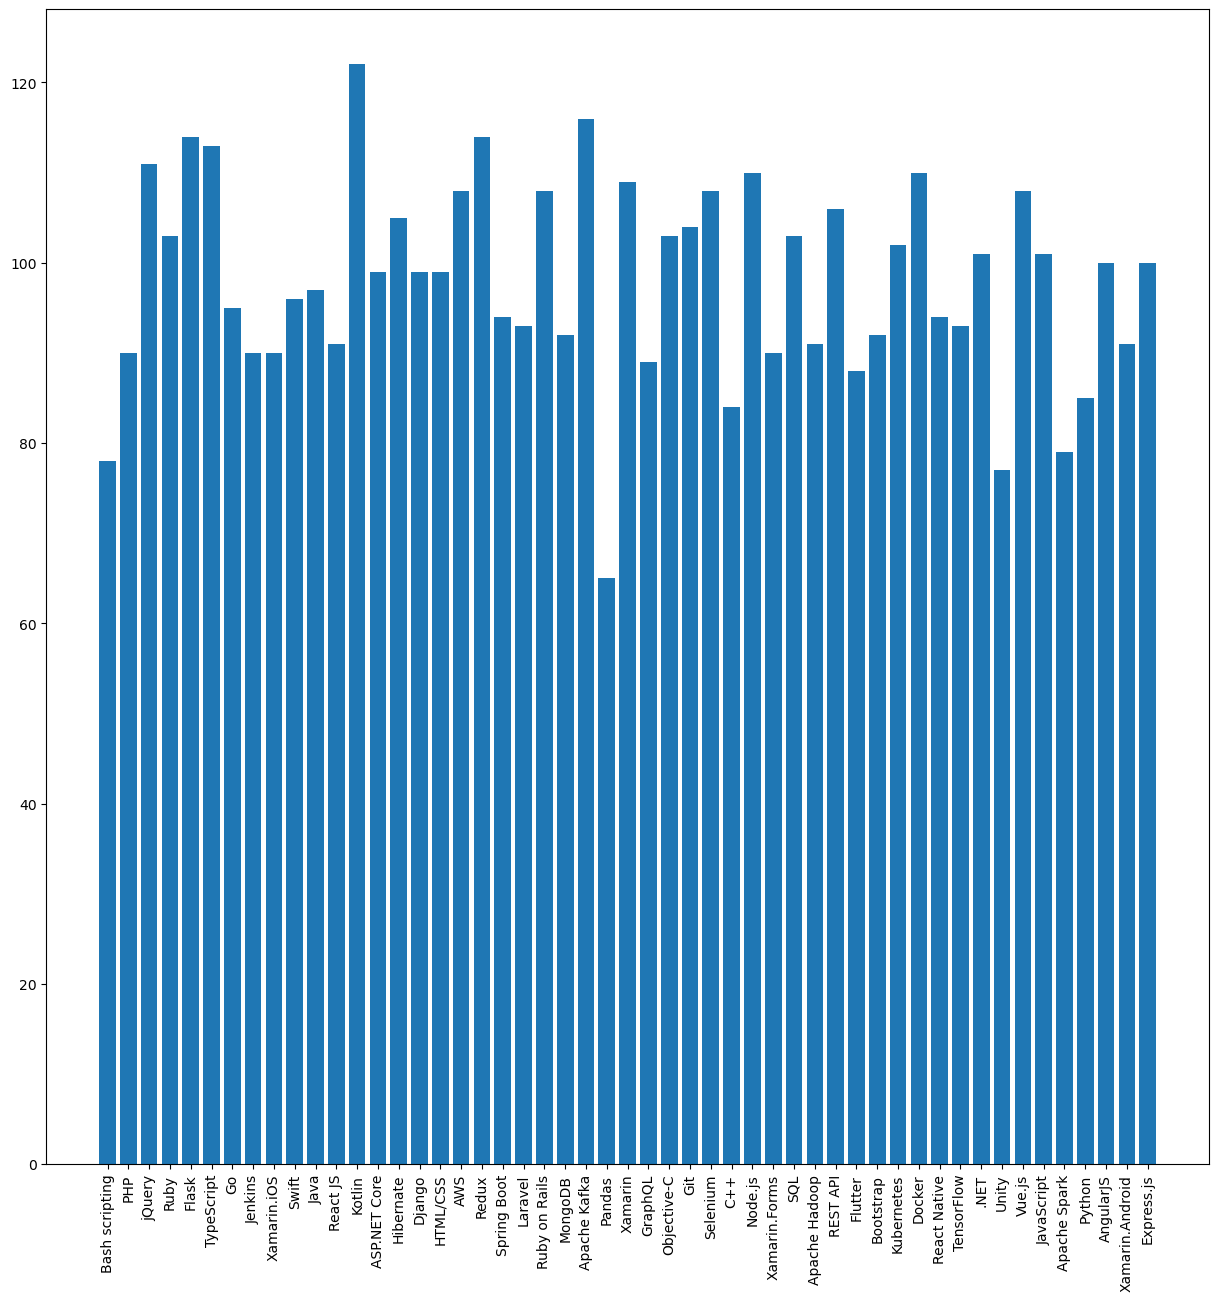

In [10]:
# Distribution of different skills in the organization

plt.figure(figsize = (15, 15))
counter = Counter(user_skills.SKILL)
plt.bar(counter.keys(), counter.values())
plt.xticks(rotation = 90)
plt.show()

In [11]:
# Distribution of different organizations from where employees take courses from

counter = Counter(user_skills.ISSUED_BY)
counter

Counter({'Mynte': 30,
         'Skimia': 30,
         'Realcube': 29,
         'Photobug': 29,
         'Meevee': 28,
         'Katz': 27,
         'Livetube': 25,
         'Jayo': 25,
         'Vipe': 25,
         'Vinder': 24,
         'Linklinks': 23,
         'Jabbersphere': 23,
         'Yoveo': 23,
         'Thoughtsphere': 23,
         'Eare': 22,
         'Yadel': 21,
         'Blogtag': 21,
         'Divanoodle': 21,
         'Centizu': 21,
         'Topicshots': 21,
         'Ntags': 21,
         'Thoughtstorm': 20,
         'Bluezoom': 20,
         'Dynabox': 20,
         'Eidel': 20,
         'Feedfire': 20,
         'Skalith': 20,
         'Aivee': 19,
         'Linkbuzz': 19,
         'Quatz': 19,
         'Wikizz': 19,
         'Fivespan': 19,
         'Layo': 19,
         'Muxo': 19,
         'Tanoodle': 19,
         'Fivebridge': 19,
         'Youfeed': 18,
         'Dabshots': 18,
         'LiveZ': 18,
         'Gigazoom': 18,
         'Jabberbean': 18,
         'Yous

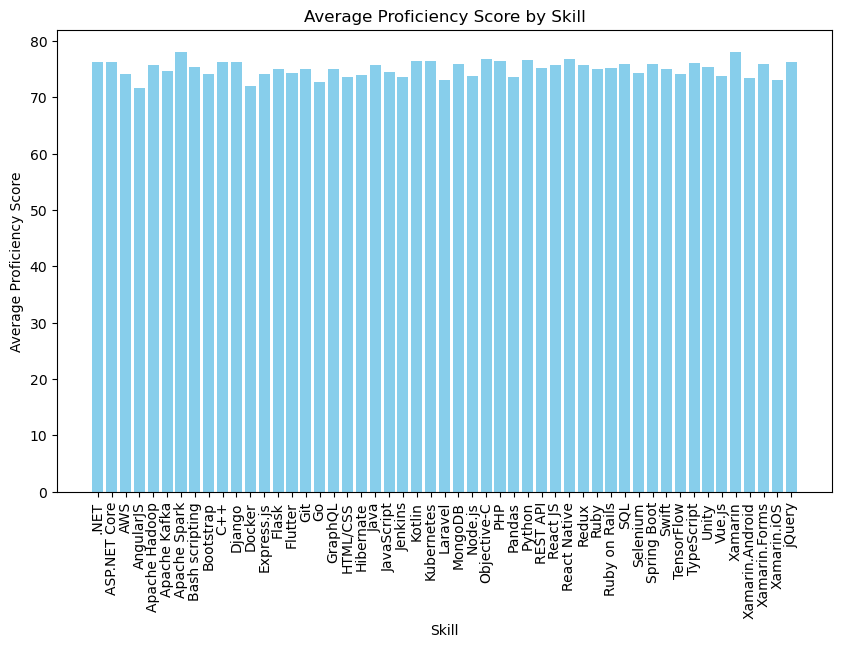

In [12]:
avg_proficiency = user_skills.groupby('SKILL')['PROFICIENCY_LEVEL'].mean().reset_index()

# Plot bar chart for average proficiency
plt.figure(figsize=(10, 6))
plt.bar(avg_proficiency['SKILL'], avg_proficiency['PROFICIENCY_LEVEL'], color='skyblue')

# Add labels and title
plt.xticks(rotation = 90)
plt.xlabel('Skill')
plt.ylabel('Average Proficiency Score')
plt.title('Average Proficiency Score by Skill')
plt.show()

In [13]:
# Knowing the users who have led the projects several times

counter = Counter(projects.TEAM_LEAD)
counter

Counter({230: 2,
         131: 2,
         276: 2,
         338: 1,
         95: 1,
         29: 1,
         137: 1,
         181: 1,
         190: 1,
         127: 1,
         304: 1,
         105: 1,
         41: 1,
         76: 1,
         340: 1,
         7: 1,
         93: 1,
         311: 1,
         122: 1,
         214: 1,
         305: 1,
         128: 1,
         67: 1,
         258: 1,
         84: 1,
         232: 1,
         215: 1,
         293: 1,
         1: 1,
         136: 1,
         74: 1,
         169: 1,
         37: 1,
         247: 1,
         99: 1,
         195: 1,
         168: 1,
         178: 1,
         336: 1,
         200: 1,
         254: 1,
         50: 1,
         34: 1,
         334: 1,
         110: 1,
         264: 1,
         191: 1})

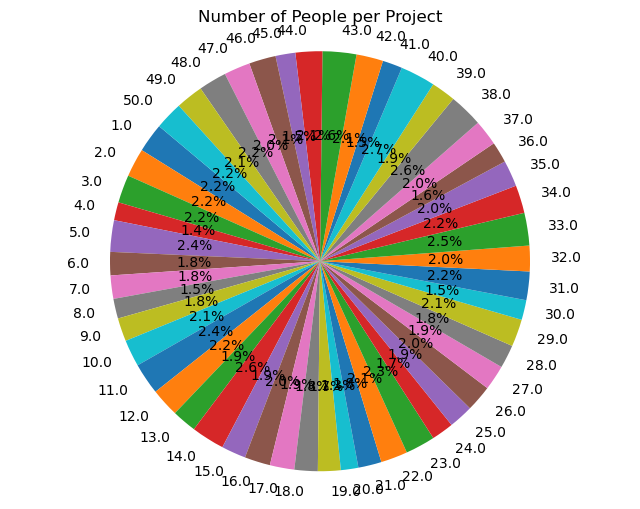


PROJECT_ID, TEAM_SIZE
PROJECT_ID
1.0     50
2.0     49
3.0     48
4.0     31
5.0     54
6.0     40
7.0     40
8.0     34
9.0     40
10.0    46
11.0    54
12.0    49
13.0    42
14.0    57
15.0    42
16.0    44
17.0    42
18.0    40
19.0    39
20.0    30
21.0    40
22.0    46
23.0    51
24.0    38
25.0    42
26.0    45
27.0    43
28.0    40
29.0    47
30.0    34
31.0    49
32.0    44
33.0    56
34.0    48
35.0    45
36.0    36
37.0    44
38.0    58
39.0    42
40.0    60
41.0    34
42.0    46
43.0    58
44.0    46
45.0    34
46.0    46
47.0    45
48.0    48
49.0    47
50.0    48
dtype: int64


In [14]:
df = pd.DataFrame(user_projects)

# Group DataFrame by 'project_id' and count the number of people in each project
project_counts = df.groupby('PROJECT_ID').size()

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(project_counts, labels = project_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Number of People per Project')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

print()
print('PROJECT_ID, TEAM_SIZE')
print(project_counts)

In [15]:
# Performing left join to merge user and their skills
user_join_user_skills = pd.merge(users, user_skills, on = 'USER_ID', how = 'left')

# Display the result
print(user_join_user_skills)

      USER_ID          FULL_NAME                       EMAIL  GENDER   ROLE  \
0           1      Darrin Sloyan     dsloyan0@altervista.org    Male   user   
1           1      Darrin Sloyan     dsloyan0@altervista.org    Male   user   
2           1      Darrin Sloyan     dsloyan0@altervista.org    Male   user   
3           1      Darrin Sloyan     dsloyan0@altervista.org    Male   user   
4           1      Darrin Sloyan     dsloyan0@altervista.org    Male   user   
...       ...                ...                         ...     ...    ...   
5005      356     Beltran Priest      bpriest5@imageshack.us    Male  admin   
5006      357  Marlie Mennithorp  mmennithorp6@tuttocitta.it  Female  admin   
5007      358       Jo ann Reeks      jann7@reverbnation.com  Female  admin   
5008      359      Linn Petkovic    lpetkovic8@economist.com  Female  admin   
5009      360        Geoffry Rex               grex9@ask.com    Male  admin   

      BIRTH_DATE     LOCATION       PHONE         S

In [16]:
# Performing left join to merge users, their skills and their relevant project experience
user_details = pd.merge(user_join_user_skills, user_projects, on = 'USER_ID', how = 'left')

# Display the result
print(user_details)

       USER_ID          FULL_NAME                       EMAIL  GENDER ROLE_x  \
0            1      Darrin Sloyan     dsloyan0@altervista.org    Male   user   
1            1      Darrin Sloyan     dsloyan0@altervista.org    Male   user   
2            1      Darrin Sloyan     dsloyan0@altervista.org    Male   user   
3            1      Darrin Sloyan     dsloyan0@altervista.org    Male   user   
4            1      Darrin Sloyan     dsloyan0@altervista.org    Male   user   
...        ...                ...                         ...     ...    ...   
42813      356     Beltran Priest      bpriest5@imageshack.us    Male  admin   
42814      357  Marlie Mennithorp  mmennithorp6@tuttocitta.it  Female  admin   
42815      358       Jo ann Reeks      jann7@reverbnation.com  Female  admin   
42816      359      Linn Petkovic    lpetkovic8@economist.com  Female  admin   
42817      360        Geoffry Rex               grex9@ask.com    Male  admin   

       BIRTH_DATE     LOCATION       PH

<h1>Prediction of Employee for Project</h1>

In [17]:
set(projects.PROJECT_CATEGORY)

{'Artificial Intelligence and Machine Learning',
 'Cloud Computing and Infrastructure',
 'Cybersecurity and Information Security',
 'Data Science and Analytics',
 'DevOps and CI/ CD',
 'E-commerce and Online Marketplace Platforms',
 'IoT and Embedded Systems',
 'Software Development'}

In [18]:
user_details

,USER_ID,FULL_NAME,EMAIL,GENDER,ROLE_x,BIRTH_DATE,LOCATION,PHONE,SKILL_x,CERTIFICATION_NAME,OBTAINED_DATE,EXPIRY_DATE,STATUS,PROFICIENCY_LEVEL,CERTIFICATION_ID,ISSUED_BY,PROJECT_ID,ROLE_y,SKILL_y
0,1,Darrin Sloyan,dsloyan0@altervista.org,Male,user,06/25/1988,Delhi,7854462788,ASP.NET Core,ASP.NET Core - Beginner,09-11-2018,04-05-2019,Yet to Verify,100.0,f833dfed-7227-4b09-b6ab-7381fd173911,Blogspan,46.0,Full Stack Developer,GraphQL
1,1,Darrin Sloyan,dsloyan0@altervista.org,Male,user,06/25/1988,Delhi,7854462788,ASP.NET Core,ASP.NET Core - Beginner,09-11-2018,04-05-2019,Yet to Verify,100.0,f833dfed-7227-4b09-b6ab-7381fd173911,Blogspan,33.0,QA Engineer,Selenium
2,1,Darrin Sloyan,dsloyan0@altervista.org,Male,user,06/25/1988,Delhi,7854462788,ASP.NET Core,ASP.NET Core - Beginner,09-11-2018,04-05-2019,Yet to Verify,100.0,f833dfed-7227-4b09-b6ab-7381fd173911,Blogspan,21.0,UI/UX Designer,Xamarin.Android
3,1,Darrin Sloyan,dsloyan0@altervista.org,Male,user,06/25/1988,Delhi,7854462788,ASP.NET Core,ASP.NET Core - Beginner,09-11-2018,04-05-2019,Yet to Verify,100.0,f833dfed-7227-4b09-b6ab-7381fd173911,Blogspan,3.0,Business Analyst,Ruby
4,1,Darrin Sloyan,dsloyan0@altervista.org,Male,user,06/25/1988,Delhi,7854462788,ASP.NET Core,ASP.NET Core - Beginner,09-11-2018,04-05-2019,Yet to Verify,100.0,f833dfed-7227-4b09-b6ab-7381fd173911,Blogspan,40.0,Business Analyst,SQL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42813,356,Beltran Priest,bpriest5@imageshack.us,Male,admin,01/28/1973,Glasgow,2742746718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42814,357,Marlie Mennithorp,mmennithorp6@tuttocitta.it,Female,admin,01-08-1976,Ahmedabad,6731511407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42815,358,Jo ann Reeks,jann7@reverbnation.com,Female,admin,04/21/1976,Los Angeles,7393338192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42816,359,Linn Petkovic,lpetkovic8@economist.com,Female,admin,02/17/1977,Manchester,5903215327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
user_details.columns

Index(['USER_ID', 'FULL_NAME', 'EMAIL', 'GENDER', 'ROLE_x', 'BIRTH_DATE',
       'LOCATION', 'PHONE', 'SKILL_x', 'CERTIFICATION_NAME', 'OBTAINED_DATE',
       'EXPIRY_DATE', 'STATUS', 'PROFICIENCY_LEVEL', 'CERTIFICATION_ID',
       'ISSUED_BY', 'PROJECT_ID', 'ROLE_y', 'SKILL_y'],
      dtype='object')

In [20]:
# Performing left join to merge users, their skills and their relevant project experience
user_details = pd.merge(user_details, projects, on = 'PROJECT_ID', how = 'left')

# Display the result
print(user_details)

       USER_ID          FULL_NAME                       EMAIL  GENDER ROLE_x  \
0            1      Darrin Sloyan     dsloyan0@altervista.org    Male   user   
1            1      Darrin Sloyan     dsloyan0@altervista.org    Male   user   
2            1      Darrin Sloyan     dsloyan0@altervista.org    Male   user   
3            1      Darrin Sloyan     dsloyan0@altervista.org    Male   user   
4            1      Darrin Sloyan     dsloyan0@altervista.org    Male   user   
...        ...                ...                         ...     ...    ...   
42813      356     Beltran Priest      bpriest5@imageshack.us    Male  admin   
42814      357  Marlie Mennithorp  mmennithorp6@tuttocitta.it  Female  admin   
42815      358       Jo ann Reeks      jann7@reverbnation.com  Female  admin   
42816      359      Linn Petkovic    lpetkovic8@economist.com  Female  admin   
42817      360        Geoffry Rex               grex9@ask.com    Male  admin   

       BIRTH_DATE   LOCATION_x       PH

In [21]:
user_details

,USER_ID,FULL_NAME,EMAIL,GENDER,ROLE_x,BIRTH_DATE,LOCATION_x,PHONE,SKILL_x,CERTIFICATION_NAME,...,DESCRIPTION,START_DATE,PROJECT_STATUS,END_DATE,CLIENT,BUDGET_USD,PRIORITY,PROJECT_CATEGORY,TEAM_LEAD,LOCATION_y
0,1,Darrin Sloyan,dsloyan0@altervista.org,Male,user,06/25/1988,Delhi,7854462788,ASP.NET Core,ASP.NET Core - Beginner,...,Sltr-haris Type II physeal fracture of lower e...,03-08-2023,Ongoing,None,Gabelli Global Small and Mid Cap Value Trust (...,835429.0,medium,DevOps and CI/ CD,334.0,Visakhapatnam
1,1,Darrin Sloyan,dsloyan0@altervista.org,Male,user,06/25/1988,Delhi,7854462788,ASP.NET Core,ASP.NET Core - Beginner,...,"Disp fx of distal phalanx of left great toe, init",04-07-2011,Completed,09-26-2012,"TC PipeLines, LP",936451.0,medium,DevOps and CI/ CD,169.0,Chennai
2,1,Darrin Sloyan,dsloyan0@altervista.org,Male,user,06/25/1988,Delhi,7854462788,ASP.NET Core,ASP.NET Core - Beginner,...,Factory as the place of occurrence of the exte...,05-22-2011,Completed,12-01-2014,International Speedway Corporation,151428.0,high,Cloud Computing and Infrastructure,305.0,Delhi
3,1,Darrin Sloyan,dsloyan0@altervista.org,Male,user,06/25/1988,Delhi,7854462788,ASP.NET Core,ASP.NET Core - Beginner,...,"Other physeal fracture of left calcaneus, sequela",07-05-2011,Completed,12-16-2016,Helen of Troy Limited,389018.0,high,IoT and Embedded Systems,95.0,Manchester
4,1,Darrin Sloyan,dsloyan0@altervista.org,Male,user,06/25/1988,Delhi,7854462788,ASP.NET Core,ASP.NET Core - Beginner,...,Type 1 diab w prolif diab rtnop w trctn dtch n...,02-12-2017,On Hold,None,"Allied World Assurance Company Holdings, AG",157356.0,medium,DevOps and CI/ CD,336.0,Pune
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42813,356,Beltran Priest,bpriest5@imageshack.us,Male,admin,01/28/1973,Glasgow,2742746718,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42814,357,Marlie Mennithorp,mmennithorp6@tuttocitta.it,Female,admin,01-08-1976,Ahmedabad,6731511407,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42815,358,Jo ann Reeks,jann7@reverbnation.com,Female,admin,04/21/1976,Los Angeles,7393338192,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42816,359,Linn Petkovic,lpetkovic8@economist.com,Female,admin,02/17/1977,Manchester,5903215327,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
user_details.columns

Index(['USER_ID', 'FULL_NAME', 'EMAIL', 'GENDER', 'ROLE_x', 'BIRTH_DATE',
       'LOCATION_x', 'PHONE', 'SKILL_x', 'CERTIFICATION_NAME', 'OBTAINED_DATE',
       'EXPIRY_DATE', 'STATUS', 'PROFICIENCY_LEVEL', 'CERTIFICATION_ID',
       'ISSUED_BY', 'PROJECT_ID', 'ROLE_y', 'SKILL_y', 'PROJECT_NAME',
       'DESCRIPTION', 'START_DATE', 'PROJECT_STATUS', 'END_DATE', 'CLIENT',
       'BUDGET_USD', 'PRIORITY', 'PROJECT_CATEGORY', 'TEAM_LEAD',
       'LOCATION_y'],
      dtype='object')

In [25]:
set(user_details.SKILL_x)

{'.NET',
 'ASP.NET Core',
 'AWS',
 'AngularJS',
 'Apache Hadoop',
 'Apache Kafka',
 'Apache Spark',
 'Bash scripting',
 'Bootstrap',
 'C++',
 'Django',
 'Docker',
 'Express.js',
 'Flask',
 'Flutter',
 'Git',
 'Go',
 'GraphQL',
 'HTML/CSS',
 'Hibernate',
 'Java',
 'JavaScript',
 'Jenkins',
 'Kotlin',
 'Kubernetes',
 'Laravel',
 'MongoDB',
 'Node.js',
 'Objective-C',
 'PHP',
 'Pandas',
 'Python',
 'REST API',
 'React JS',
 'React Native',
 'Redux',
 'Ruby',
 'Ruby on Rails',
 'SQL',
 'Selenium',
 'Spring Boot',
 'Swift',
 'TensorFlow',
 'TypeScript',
 'Unity',
 'Vue.js',
 'Xamarin',
 'Xamarin.Android',
 'Xamarin.Forms',
 'Xamarin.iOS',
 'jQuery',
 nan}

In [51]:
set(user_details.PROJECT_CATEGORY)
project_category = []
for i in user_details.PROJECT_CATEGORY:
    if type(i) == type('s'):
        project_category.append(i)

project_category = list(set(project_category))
project_category

['IoT and Embedded Systems',
 'DevOps and CI/ CD',
 'Cybersecurity and Information Security',
 'Artificial Intelligence and Machine Learning',
 'Data Science and Analytics',
 'Software Development',
 'Cloud Computing and Infrastructure',
 'E-commerce and Online Marketplace Platforms']

In [47]:
set(user_details.ROLE_y)
roles = []
for i in set(user_details.ROLE_y):
    if type(i) == type('s'):
        roles.append(i)
roles

['DevOps Engineer',
 'Team Leader',
 'QA Engineer',
 'Full Stack Developer',
 'Business Analyst',
 'System Analyst',
 'UI/UX Designer']

In [29]:
user_details.columns

Index(['USER_ID', 'FULL_NAME', 'EMAIL', 'GENDER', 'ROLE_x', 'BIRTH_DATE',
       'LOCATION_x', 'PHONE', 'SKILL_x', 'CERTIFICATION_NAME', 'OBTAINED_DATE',
       'EXPIRY_DATE', 'STATUS', 'PROFICIENCY_LEVEL', 'CERTIFICATION_ID',
       'ISSUED_BY', 'PROJECT_ID', 'ROLE_y', 'SKILL_y', 'PROJECT_NAME',
       'DESCRIPTION', 'START_DATE', 'PROJECT_STATUS', 'END_DATE', 'CLIENT',
       'BUDGET_USD', 'PRIORITY', 'PROJECT_CATEGORY', 'TEAM_LEAD',
       'LOCATION_y'],
      dtype='object')

In [60]:
def filter_records(df, skills = [], project_category = None, roles = [], location = None):
    stack = []
    filtered_df = df[df['ROLE_y'].isin(roles)]
    stack.append(filtered_df)
    if skills:
        filtered_df = filtered_df[filtered_df['SKILL_y'].isin(skills)]
        stack.append(filtered_df)
    # if project:
    #     filtered_df = filtered_df[filtered_df['PROJECT_NAME_x'] != '']
    if project_category:
        filtered_df = filtered_df[filtered_df['PROJECT_CATEGORY'] == project_category]
        stack.append(filtered_df)
    if location:
        filtered_df = filtered_df[filtered_df['LOCATION_y'] == location]
        stack.append(filtered_df)
    filtered_df = filtered_df[filtered_df['END_DATE'] != None]
    stack.append(filtered_df)

    while stack:
        if len(stack[-1]) >= 10:
            return stack[-1]
        stack.pop()
    return filtered_df


In [82]:
roles.sort()
project_category.sort()

curr_project_tech_stack = input('Enter project tech stack seperated by commas:').split(' ')

print('\nEnter the number for project category: ')
for i in range(len(project_category)):
    print(i + 1,'. ',project_category[i])

project_category_num = int(input("Enter the project's category: "))
project_priority = (input("Enter the project's priority: "))

print('Enter the numbers for role: ')
for i in range(len(roles)):
    print(i + 1,'. ',roles[i])

roles_needed = input('Enter the roles needed seperated by commas: ').split(',')
for i in range(len(roles_needed)):
    roles_needed[i] = roles[i]

location = input("Enter location of the project: ")

# ans = filter_records(user_details, ['React JS'], 'Software Development', ['Full Stack Developer'], 'Chennai')

ans = filter_records(user_details, curr_project_tech_stack, project_category[project_category_num - 1], roles_needed, location)
ans = ans.reset_index()
ans

Enter project tech stack seperated by commas: Python



Enter the number for project category: 
1 .  Artificial Intelligence and Machine Learning
2 .  Cloud Computing and Infrastructure
3 .  Cybersecurity and Information Security
4 .  Data Science and Analytics
5 .  DevOps and CI/ CD
6 .  E-commerce and Online Marketplace Platforms
7 .  IoT and Embedded Systems
8 .  Software Development


Enter the project's category:  8
Enter the project's priority:  medium


Enter the numbers for role: 
1 .  Business Analyst
2 .  DevOps Engineer
3 .  Full Stack Developer
4 .  QA Engineer
5 .  System Analyst
6 .  Team Leader
7 .  UI/UX Designer


Enter the roles needed seperated by commas:  3,7
Enter location of the project:  Chennai


,index,USER_ID,FULL_NAME,EMAIL,GENDER,ROLE_x,BIRTH_DATE,LOCATION_x,PHONE,SKILL_x,...,DESCRIPTION,START_DATE,PROJECT_STATUS,END_DATE,CLIENT,BUDGET_USD,PRIORITY,PROJECT_CATEGORY,TEAM_LEAD,LOCATION_y
0,2791,25,Lyndsie Vardie,lvardieo@aboutads.info,Female,user,09/21/1986,Pune,2519086152,MongoDB,...,"Sltr-haris Type III physl fx low end l tibia, ...",02-27-2017,Completed,None,Lennar Corporation,62742.0,medium,Cybersecurity and Information Security,264.0,Nagpur
1,2804,25,Lyndsie Vardie,lvardieo@aboutads.info,Female,user,09/21/1986,Pune,2519086152,Node.js,...,"Sltr-haris Type III physl fx low end l tibia, ...",02-27-2017,Completed,None,Lennar Corporation,62742.0,medium,Cybersecurity and Information Security,264.0,Nagpur
2,2817,25,Lyndsie Vardie,lvardieo@aboutads.info,Female,user,09/21/1986,Pune,2519086152,Jenkins,...,"Sltr-haris Type III physl fx low end l tibia, ...",02-27-2017,Completed,None,Lennar Corporation,62742.0,medium,Cybersecurity and Information Security,264.0,Nagpur
3,2830,25,Lyndsie Vardie,lvardieo@aboutads.info,Female,user,09/21/1986,Pune,2519086152,Go,...,"Sltr-haris Type III physl fx low end l tibia, ...",02-27-2017,Completed,None,Lennar Corporation,62742.0,medium,Cybersecurity and Information Security,264.0,Nagpur
4,2843,25,Lyndsie Vardie,lvardieo@aboutads.info,Female,user,09/21/1986,Pune,2519086152,Java,...,"Sltr-haris Type III physl fx low end l tibia, ...",02-27-2017,Completed,None,Lennar Corporation,62742.0,medium,Cybersecurity and Information Security,264.0,Nagpur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,40471,330,Rosalyn Burger,rburger95@webeden.co.uk,Female,approver,08-01-1987,Los Angeles,6614639368,JavaScript,...,"Interstitial myositis, left forearm",03-20-2024,Completed,None,"FairPoint Communications, Inc.",610511.0,medium,Artificial Intelligence and Machine Learning,128.0,Edinburgh
172,40477,330,Rosalyn Burger,rburger95@webeden.co.uk,Female,approver,08-01-1987,Los Angeles,6614639368,Apache Spark,...,"Interstitial myositis, left forearm",03-20-2024,Completed,None,"FairPoint Communications, Inc.",610511.0,medium,Artificial Intelligence and Machine Learning,128.0,Edinburgh
173,40483,330,Rosalyn Burger,rburger95@webeden.co.uk,Female,approver,08-01-1987,Los Angeles,6614639368,Apache Hadoop,...,"Interstitial myositis, left forearm",03-20-2024,Completed,None,"FairPoint Communications, Inc.",610511.0,medium,Artificial Intelligence and Machine Learning,128.0,Edinburgh
174,40489,330,Rosalyn Burger,rburger95@webeden.co.uk,Female,approver,08-01-1987,Los Angeles,6614639368,Ruby,...,"Interstitial myositis, left forearm",03-20-2024,Completed,None,"FairPoint Communications, Inc.",610511.0,medium,Artificial Intelligence and Machine Learning,128.0,Edinburgh


In [83]:
columns = ans.columns
required = ['USER_ID', 'FULL_NAME', 'EMAIL']

In [84]:
users = {(row['USER_ID'], row['FULL_NAME'], row['EMAIL']) for _, row in ans.iterrows()}

In [85]:
users

{(25, 'Lyndsie Vardie', 'lvardieo@aboutads.info'),
 (49, 'Boone Figge', 'bfigge1c@icio.us'),
 (83, 'Heda Dies', 'hdies2a@drupal.org'),
 (84, 'Nehemiah Stennard', 'nstennard2b@free.fr'),
 (85, 'Corly Basnett', 'cbasnett2c@etsy.com'),
 (94, 'Jermayne Mapham', 'jmapham2l@prnewswire.com'),
 (95, 'Jereme Buchett', 'jbuchett2m@senate.gov'),
 (143, 'Rollins Goodban', 'rgoodban3y@usnews.com'),
 (166, 'Ernesto MacQueen', 'emacqueen4l@networkadvertising.org'),
 (235, 'Darnell Thirlwell', 'dthirlwell6i@msu.edu'),
 (301, 'Windham Obeney', 'wobeney8c@cornell.edu'),
 (330, 'Rosalyn Burger', 'rburger95@webeden.co.uk')}